In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint

exec(open('utils.py').read())
print('Loaded')

Loaded


In [2]:
def pct_dist(a, b):
    return sq.lognorm(a, b, lclip=0.001, rclip=1, credibility=80) 


def openai_spend_on_largest_model_this_year(total_investment,
                                            percent_investment_spent_this_year,
                                            percent_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(total_investment * percent_investment_spent_this_year * percent_spend_on_compute * percent_compute_on_biggest_model,
                      fn=np.log10)


gpt3_prediction = openai_spend_on_largest_model_this_year(total_investment=1*B,
                                                          percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                          percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                          percent_compute_on_biggest_model=pct_dist(0.05, 0.15))


samples = gpt3_prediction @ (100*K)

# See: https://docs.google.com/spreadsheets/d/1cLzO_tX9b4z6URKLFvzc0MtsN4GrftkFZuv1bCxeWVY/edit#gid=555410569
actual_gpt3_spend = 2.4*M

pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))
print('-')
print('Actual spend is at the {}th percentile of the model'.format(round(np.mean([s <= np.log10(actual_gpt3_spend) for s in samples]) * 100, 1)))


{1: '621 thousand',
 5: '1 million',
 10: '2 million',
 20: '2 million',
 30: '3 million',
 40: '4 million',
 50: '5 million',
 60: '6 million',
 70: '8 million',
 80: '10 million',
 90: '15 million',
 95: '21 million',
 99: '38 million'}
-
Actual spend is at the 21.1th percentile of the model


In [3]:
# OpenAI has 375 people as of 2023 Jan per https://twitter.com/sama/status/1617627882997813248
# if we assume it costs $500K per person and that payroll is half of non-compute costs, that means $375M per year is spent
largest_openai_model_2023_prediction = openai_spend_on_largest_model_this_year(total_investment=10*B,
                                                                               percent_investment_spent_this_year=pct_dist(0.05, 0.3),
                                                                               percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.05, 0.2))
samples = largest_openai_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '6 million',
 5: '12 million',
 10: '17 million',
 20: '25 million',
 30: '34 million',
 40: '44 million',
 50: '56 million',
 60: '72 million',
 70: '92 million',
 80: '124 million',
 90: '187 million',
 95: '261 million',
 99: '498 million'}


In [4]:
# https://www.nytimes.com/2023/01/27/technology/anthropic-ai-funding.html
largest_anthropic_model_2023_prediction = openai_spend_on_largest_model_this_year(total_investment=300*M,
                                                                                  percent_investment_spent_this_year=pct_dist(0.1, 0.3),
                                                                                  percent_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                  percent_compute_on_biggest_model=pct_dist(0.1, 0.7))
samples = largest_anthropic_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '718 thousand',
 5: '1 million',
 10: '2 million',
 20: '3 million',
 30: '4 million',
 40: '5 million',
 50: '6 million',
 60: '8 million',
 70: '10 million',
 80: '14 million',
 90: '20 million',
 95: '27 million',
 99: '45 million'}


In [5]:
def google_spend_on_largest_model_this_year(annual_r_and_d_spend,
                                            percent_r_and_d_on_ai,
                                            percent_ai_spend_on_compute,
                                            percent_compute_on_biggest_model):
    return sq.dist_fn(annual_r_and_d_spend *
                      percent_r_and_d_on_ai *
                      percent_ai_spend_on_compute *
                      percent_compute_on_biggest_model, fn=np.log10)


largest_google_model_2023_prediction = google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.norm(22*B, 40*B, lclip=20*B),
                                                                               percent_r_and_d_on_ai=pct_dist(0.05, 0.5),
                                                                               percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                               percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_google_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '526 thousand',
 5: '1 million',
 10: '2 million',
 20: '4 million',
 30: '8 million',
 40: '13 million',
 50: '22 million',
 60: '37 million',
 70: '64 million',
 80: '122 million',
 90: '299 million',
 95: '627 million',
 99: '2 billion'}


In [6]:
largest_fb_model_2023_prediction = google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.norm(22*B, 40*B, lclip=20*B),
                                                                           percent_r_and_d_on_ai=pct_dist(0.05, 0.2),
                                                                           percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                           percent_compute_on_biggest_model=pct_dist(0.001, 0.1))
samples = largest_fb_model_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))

{1: '542 thousand',
 5: '1 million',
 10: '2 million',
 20: '3 million',
 30: '5 million',
 40: '9 million',
 50: '14 million',
 60: '23 million',
 70: '38 million',
 80: '71 million',
 90: '164 million',
 95: '332 million',
 99: '1 billion'}


In [10]:
us_gov_2023_prediction = sq.mixture([[0.95, sq.norm(6, 8, lclip=6)],
                                     [0.05, google_spend_on_largest_model_this_year(annual_r_and_d_spend=sq.lognorm(10*B, T, lclip=B),
                                                                                    percent_r_and_d_on_ai=1,
                                                                                    percent_ai_spend_on_compute=pct_dist(0.3, 0.7),
                                                                                    percent_compute_on_biggest_model=pct_dist(0.001, 0.1))]])
samples = us_gov_2023_prediction @ (100*K)
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(samples).items()]))


{1: '1 million',
 5: '1 million',
 10: '2 million',
 20: '3 million',
 30: '5 million',
 40: '8 million',
 50: '11 million',
 60: '16 million',
 70: '24 million',
 80: '39 million',
 90: '85 million',
 95: '189 million',
 99: '3 billion'}


In [11]:
mixed_model = (largest_openai_model_2023_prediction >>
               sq.dist_max(largest_anthropic_model_2023_prediction) >>
               sq.dist_max(largest_google_model_2023_prediction) >>
               sq.dist_max(largest_fb_model_2023_prediction) >>
               sq.dist_max(us_gov_2023_prediction))
mixed_model

<Distribution> max(max(max(max(log10(10000000000 * lognorm(mean=-2.1, sd=0.7, lclip=0.001, rclip=1) * lognorm(mean=-0.78, sd=0.33, lclip=0.001, rclip=1) * lognorm(mean=-2.3, sd=0.54, lclip=0.001, rclip=1)), log10(300000000 * lognorm(mean=-1.75, sd=0.43, lclip=0.001, rclip=1) * lognorm(mean=-0.78, sd=0.33, lclip=0.001, rclip=1) * lognorm(mean=-1.33, sd=0.76, lclip=0.001, rclip=1))), log10(norm(mean=31000000000.0, sd=5471611487.21, lclip=20000000000) * lognorm(mean=-1.84, sd=0.9, lclip=0.001, rclip=1) * lognorm(mean=-0.78, sd=0.33, lclip=0.001, rclip=1) * lognorm(mean=-4.61, sd=1.8, lclip=0.001, rclip=1))), log10(norm(mean=31000000000.0, sd=5471611487.21, lclip=20000000000) * lognorm(mean=-2.3, sd=0.54, lclip=0.001, rclip=1) * lognorm(mean=-0.78, sd=0.33, lclip=0.001, rclip=1) * lognorm(mean=-4.61, sd=1.8, lclip=0.001, rclip=1))), mixture
 - norm(mean=7.0, sd=0.61, lclip=6)
 - log10(lognorm(mean=25.33, sd=1.4, lclip=1000000000) * 1 * lognorm(mean=-0.78, sd=0.33, lclip=0.001, rclip=1) * l

In [12]:
pprint(dict([(i[0], numerize(10 ** i[1])) for i in sq.get_percentiles(mixed_model @ (100*K)).items()]))

{1: '15 million',
 5: '27 million',
 10: '36 million',
 20: '53 million',
 30: '70 million',
 40: '91 million',
 50: '118 million',
 60: '154 million',
 70: '210 million',
 80: '316 million',
 90: '618 million',
 95: '1 billion',
 99: '5 billion'}


100%|███████████████████████████████████████████████████████| 40000/40000 [00:00<00:00, 665833.88it/s]


Writing cache to file `caches/initial_pay.sqcache.npy`...
...Cached
{1: 7.2,
 5: 7.4,
 10: 7.6,
 20: 7.7,
 30: 7.8,
 40: 8.0,
 50: 8.1,
 60: 8.2,
 70: 8.3,
 80: 8.5,
 90: 8.8,
 95: 9.1,
 99: 9.7}


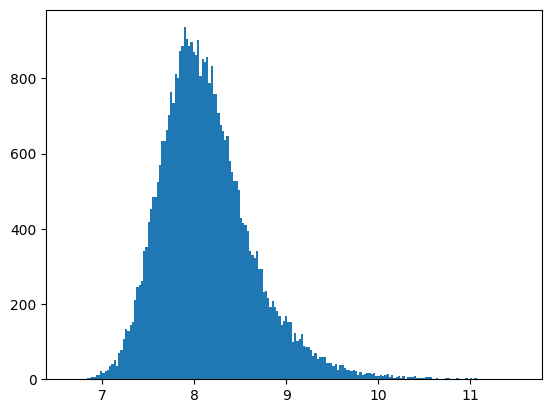

In [13]:
log_initial_pay_samples = sq.sample(mixed_model, dump_cache_file='caches/initial_pay', n=40000, verbose=True)
pprint(sq.get_percentiles(log_initial_pay_samples, digits=1))
plt.hist(log_initial_pay_samples, bins=200)
plt.show()